<img src="Macbeth.jpg" width="450" height="300" align="right"/>

# Word Frequency Analysis of Macbeth 


Author: Christoph Güttner 

**Abstract**: The word frequencies of Shakespeare's Macbeth are  
specified and visualised by the means of state of the art libraries.  
    
The common preprocessing steps -tokenizing, tagging and lemmatization-  
are done, whereby tokenizing describes the splitting of text into  
single words, tagging describes the  process of classifying words into their  
parts of speech and labeling them accordingly (parts of speech are also  
known as word classes or lexical categories (e.g noun, verb etc...), and last  
lemmatization is the process of grouping together the inflected forms of  
a word so they can be analysed as a single item (e.g. think, thinks).  
  
*Result*: Due to the order of preprocessing steps, some mistakes can occure  
concerning the identification of verbs respectively nouns.




In [23]:
import os
import pandas as pd
import numpy as np
from collections import Counter

import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords

import matplotlib.pyplot as plt 
import seaborn as sns


## Import Corpus

In [24]:
Shakespear_doc1 = open(r"C:\Users\Party\Documents\PythonFiles\Text Analysis\Data\books\Macbeth.txt" , "r")
Shakespear = Shakespear_doc1.readlines()
for Macbeth in Shakespear[50:60]:
    print(Macbeth)

FIRST WITCH.

When shall we three meet again?

In thunder, lightning, or in rain?



SECOND WITCH.

When the hurlyburly's done,

When the battle's lost and won.



THIRD WITCH.

That will be ere the set of sun.



In [25]:
Shakespear_doc = open(r"C:\Users\Party\Documents\PythonFiles\Text Analysis\Data\books\Macbeth.txt" , "r")
content = Shakespear_doc.read()



## Tokenization

### Remove Punktuation
### Remove Stopwords
### Make Lowever Case


In [26]:

#Shakespear_token = nltk.word_tokenize(content)
tokens = nltk.wordpunct_tokenize(content)
text = nltk.Text(tokens) 
words = [w.lower() for w in text if w.isalpha()]
filtered_words = [word for word in words if word not in stopwords.words('english')]


### Get Frequency

Text(0.5, 1.0, '100 most common Words in Macbeth')

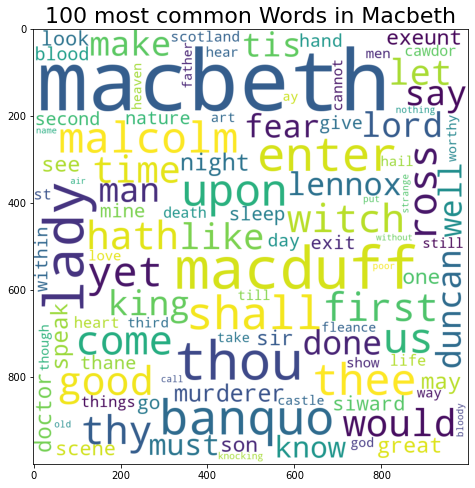

In [27]:

word_freq = Counter(filtered_words)
word_Shakes = word_freq.most_common()
word_Shakes = word_Shakes[0:100]
word_cloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(word_Shakes))

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.title("100 most common Words in Macbeth", fontsize = 22)

In [28]:

Word, Freq =[],[]
for i in range(100):
    word= word_Shakes[0:100][i][0]
    freq= word_Shakes[0:100][i][1]
    Word.append(word)
    Freq.append(freq)

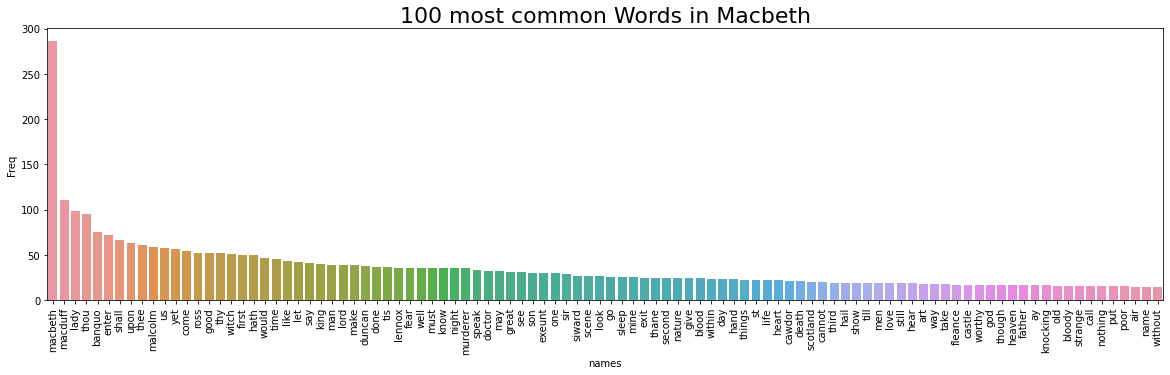

In [29]:
dictionary = {'names':Word, 'Freq':Freq}
df=pd.DataFrame(dictionary)
plt.figure(figsize=(20,5))
plt.title("100 most common Words in Macbeth", fontsize = 22)
hist = sns.barplot( x="names", y="Freq", data=df)
for item in hist.get_xticklabels():
    item.set_rotation(90)

## Verbs

In [30]:
verb_tags = ["VBD", "VBG", "VBN", "VBP", "VBZ"]

Shakespear_tokens = nltk.pos_tag(filtered_words)
verbs = []
for token, tag in Shakespear_tokens:
    if tag in verb_tags:
        verbs.append(token)


Text(0.5, 1.0, '100 most comon Verbs in Macbeth')

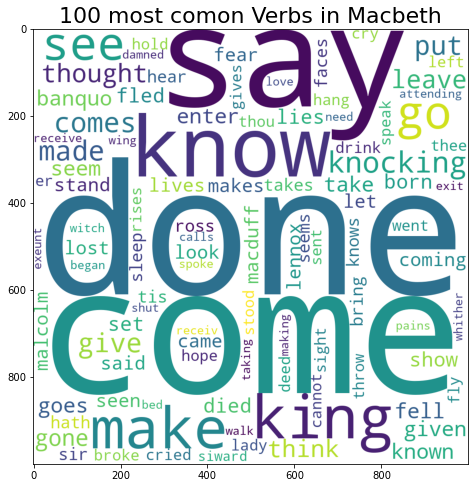

In [31]:
verb_freq = Counter(verbs)
verbs_Shakes = verb_freq.most_common()
verbs_Shakes.remove(verbs_Shakes[0])
word_cloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(verbs_Shakes[0:100]))

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.title("100 most comon Verbs in Macbeth", fontsize = 22)

## Verb_Lemmas

In [32]:
lmtzr = nltk.stem.wordnet.WordNetLemmatizer()

verb_lemmas = []
        
for participle in verbs:
    lemma = lmtzr.lemmatize(participle, "v") 
    verb_lemmas.append(lemma)


Text(0.5, 1.0, 'Verb_Lemma in Macbeth')

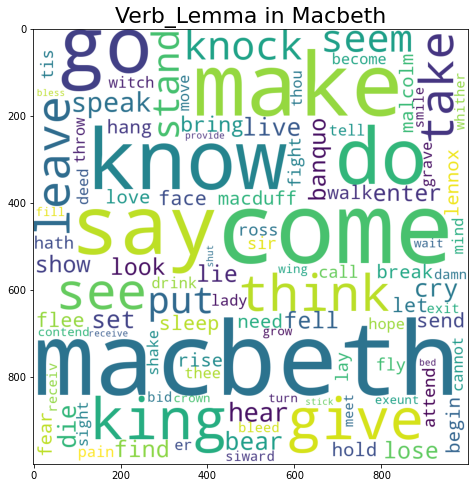

In [33]:
lemma_freq = Counter(verb_lemmas)
lemma_Shakes = lemma_freq.most_common()
lemma_Shakes=lemma_Shakes[0:100]
word_cloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(lemma_Shakes))

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.title("Verb_Lemma in Macbeth", fontsize = 22)